# 2. Use a custom dataset to train our model using handwritten recognition.

Make sure to install cv2 and tensorflow libraries before importing!!!

In [27]:
#Import all the libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Preprocessing

In [28]:
# Jason's 20 x 16 dataset

dim = 28
    
def getHandwrittenData(path="handwritten_training_data.png", verbose=False, displayOrig=True, factor=1):
    img = cv2.imread(path)[:,:,0]

    if displayOrig:
        temp = np.invert(np.array([img]))
        plt.imshow(temp[0], cmap=plt.cm.binary)
        plt.show()
    
    resInput = [None]*16
    for row in range(16):
        cur = [None]*20
        for col in range(20):
            sub = img[row*29+1:row*29+29, col*29+1:col*29+29]
            sub = np.invert(np.array([sub]))
    
            cur[col]=sub
            if verbose:
                plt.imshow(sub[0], cmap=plt.cm.binary)
                plt.show()
        resInput[row] = cur

    resOutput = [None]*(20*16)
    for i in range(16):
        output = [0] * 16
        output[i]=1
        for idx in range(i*20, i*20+20):
            resOutput[idx]=output
    resInput = resInput * factor
    resOutput = resOutput * factor
    return resInput, resOutput
# getHandwrittenData()

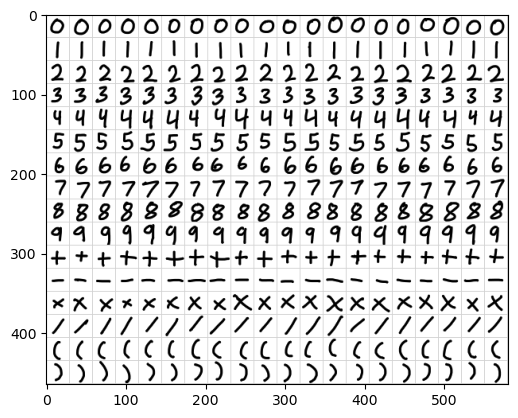

In [29]:
resInput, resOutput = getHandwrittenData(path="handwritten_training_data.png", verbose=False, displayOrig=True)

resInput = tf.reshape(resInput, (-1, 28, 28, 1))  # Assuming each image is 28x28 pixels
resOutput = tf.reshape(resOutput, (-1, 16, 1))  # Assuming each image is 28x28 pixels

x_test = tf.stack([resInput[i] for i in range(0, 320, 20)])
y_test = tf.stack([resOutput[i] for i in range(0, 320, 20)])

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(16, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training the model with a set seed

In [31]:
# Funney
seed = hash("Group6TheBest") % (10**9 + 7)
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()
model.fit(resInput, resOutput, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20


ValueError: in user code:

    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 998, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1092, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\metrics\base_metric.py", line 143, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\metrics\base_metric.py", line 700, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\metrics\metrics.py", line 3669, in sparse_categorical_accuracy
        matches = metrics_utils.sparse_categorical_matches(y_true, y_pred)
    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\utils\metrics_utils.py", line 962, in sparse_categorical_matches
        y_true = tf.squeeze(y_true, [-1])

    ValueError: Can not squeeze dim[1], expected a dimension of 1, got 16 for '{{node Squeeze}} = Squeeze[T=DT_FLOAT, squeeze_dims=[-1]](remove_squeezable_dimensions/Squeeze)' with input shapes: [32,16].


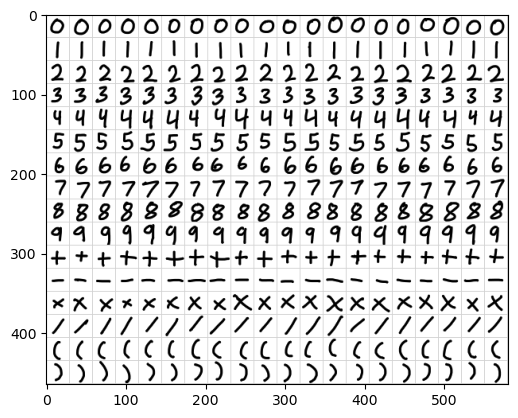

Epoch 1/20
10/10 [==============================] - 12s 192ms/step - loss: 47.4142 - accuracy: 0.3313 - val_loss: 5.9823 - val_accuracy: 0.7500
Epoch 2/20
10/10 [==============================] - 0s 17ms/step - loss: 3.5416 - accuracy: 0.8125 - val_loss: 0.8207 - val_accuracy: 0.8125
Epoch 3/20
10/10 [==============================] - 0s 15ms/step - loss: 0.7613 - accuracy: 0.8938 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 4/20
10/10 [==============================] - 0s 14ms/step - loss: 0.3131 - accuracy: 0.9625 - val_loss: 0.2167 - val_accuracy: 0.9375
Epoch 5/20
10/10 [==============================] - 0s 16ms/step - loss: 0.0641 - accuracy: 0.9906 - val_loss: 2.1216e-05 - val_accuracy: 1.0000
Epoch 6/20
10/10 [==============================] - 0s 14ms/step - loss: 0.0216 - accuracy: 0.9937 - val_loss: 1.1035e-04 - val_accuracy: 1.0000
Epoch 7/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0135 - accuracy: 0.9937 - val_loss: 0.0000e+00 - val_accuracy: 1.000

In [32]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def getHandwrittenData(path="handwritten_training_data.png", verbose=False, displayOrig=True, factor=1):
    img = cv2.imread(path)[:,:,0]

    if displayOrig:
        temp = np.invert(np.array([img]))
        plt.imshow(temp[0], cmap=plt.cm.binary)
        plt.show()
    
    resInput = [None]*16
    for row in range(16):
        cur = [None]*20
        for col in range(20):
            sub = img[row*29+1:row*29+29, col*29+1:col*29+29]
            sub = np.invert(np.array([sub]))
    
            cur[col]=sub
            if verbose:
                plt.imshow(sub[0], cmap=plt.cm.binary)
                plt.show()
        resInput[row] = cur

    resOutput = [None]*(20*16)
    for i in range(16):
        output = [0] * 16
        output[i]=1
        for idx in range(i*20, i*20+20):
            resOutput[idx]=output
    resInput = resInput * factor
    resOutput = resOutput * factor
    return resInput, resOutput

resInput, resOutput = getHandwrittenData(path="handwritten_training_data.png", verbose=False, displayOrig=True)

resInput = tf.reshape(resInput, (-1, 28, 28, 1))  # Assuming each image is 28x28 pixels
resOutput = tf.reshape(resOutput, (-1, 16))  # Corrected to match the target output shape

x_test = tf.stack([resInput[i] for i in range(0, 320, 20)])
y_test = tf.stack([resOutput[i] for i in range(0, 320, 20)])

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(16, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

seed = hash("Group6TheBest") % (10**9 + 7)
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()
model.fit(resInput, resOutput, epochs=20, validation_data=(x_test, y_test))


In [33]:
loss, accuracy = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 35ms/step - loss: 1.5646e-07 - accuracy: 1.0000


In [34]:
print(loss)
print(accuracy)

1.5646199358343438e-07
1.0


## Testing it with my own handwritten numbers

Processing: jason_digits/digit0.png
1/1 [==============================] - 0s 217ms/step
This digit is probably a 0


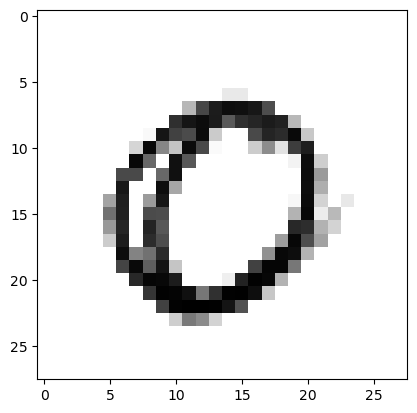

Processing: jason_digits/digit1.png
1/1 [==============================] - 0s 25ms/step
This digit is probably a 1


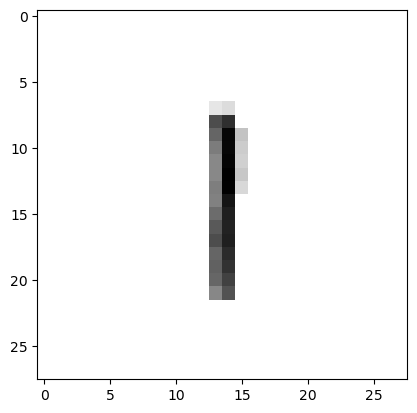

Processing: jason_digits/digit2.png
1/1 [==============================] - 0s 28ms/step
This digit is probably a 6


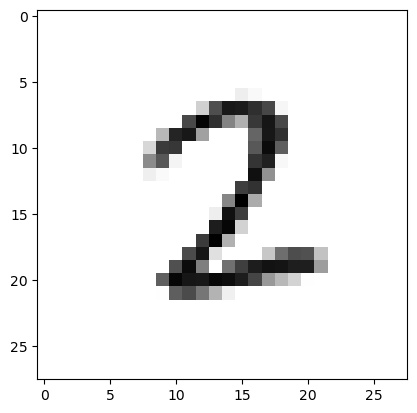

Processing: jason_digits/digit3.png
1/1 [==============================] - 0s 26ms/step
This digit is probably a 3


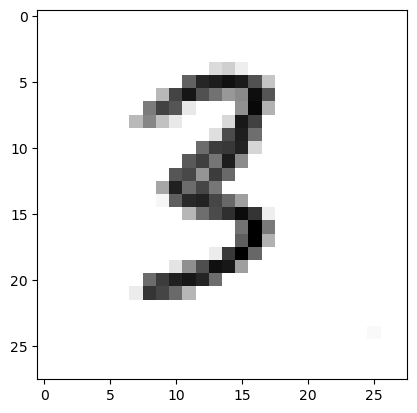

Processing: jason_digits/digit4.png
1/1 [==============================] - 0s 26ms/step
This digit is probably a 12


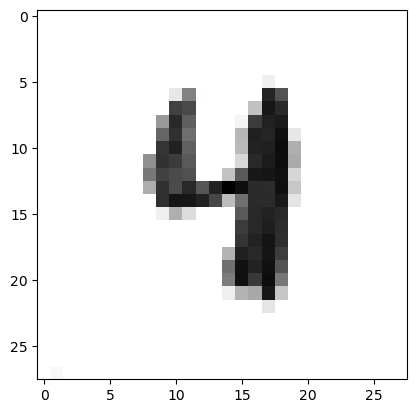

Processing: jason_digits/digit5.png
1/1 [==============================] - 0s 24ms/step
This digit is probably a 7


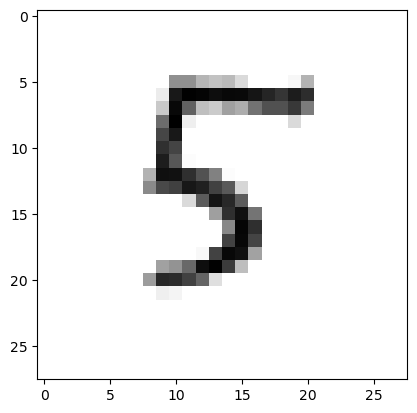

Processing: jason_digits/digit6.png
1/1 [==============================] - 0s 26ms/step
This digit is probably a 6


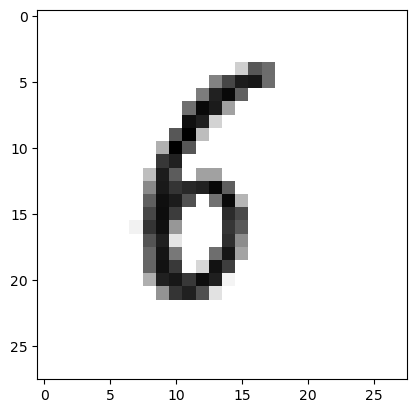

Processing: jason_digits/digit7.png
1/1 [==============================] - 0s 29ms/step
This digit is probably a 13


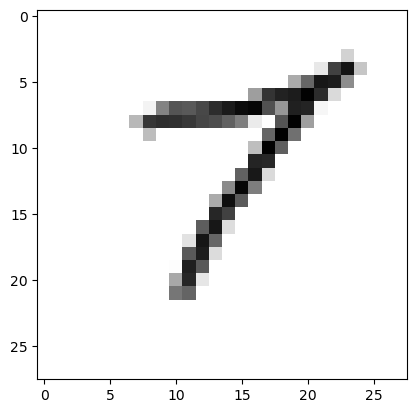

Processing: jason_digits/digit8.png
1/1 [==============================] - 0s 27ms/step
This digit is probably a 8


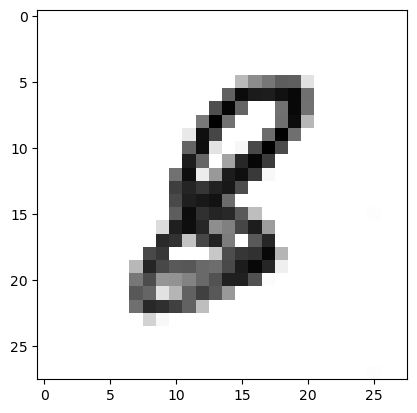

Processing: jason_digits/digit9.png
1/1 [==============================] - 0s 25ms/step
This digit is probably a 10


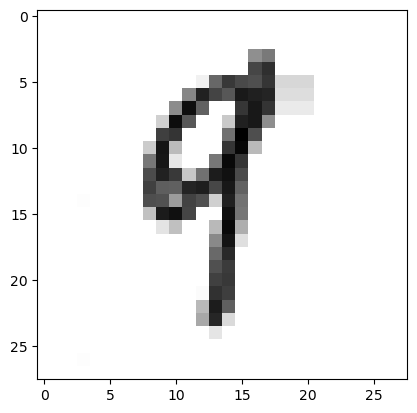

In [35]:
image_number = 1

# Enable interactive mode for matplotlib
plt.ion()

image_number = 0
# folder_name = "digits_samples"
folder_name = "jason_digits"

while os.path.isfile(f"{folder_name}/digit{image_number}.png"):
    try:
        # Debugging statement
        print(f"Processing: {folder_name}/digit{image_number}.png")
        
        img = cv2.imread(f"{folder_name}/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        
        # Ensure the image is correctly read and processed
        if img is not None:
            prediction = model.predict(img)
            print(f"This digit is probably a {np.argmax(prediction)}")
            plt.imshow(img[0], cmap=plt.cm.binary)
            plt.show()
        else:
            print(f"Failed to load image {folder_name}/digit{image_number}.png")
            
    except Exception as e:
        print(f"Error: {e}")
    finally:
        image_number += 1

# Turn off interactive mode
plt.ioff()

### Parse some expression

In [36]:
import cv2
import numpy as np
dim = 28

def isEmpty(imgBin):
    imgBin = imgBin[0]
    for row in imgBin:
        if row.tolist().count(0)!=dim: return False
    return True
    
def splitExpression(path="expression0.png", verbose=False, displayOrig=True):
    img = cv2.imread(path)[:,:,0]
    divs = img.shape[1]//dim

    if displayOrig:
        temp = np.invert(np.array([img]))
        plt.imshow(temp[0], cmap=plt.cm.binary)
        plt.show()
    res = []
    for i in range(divs):
        sub = img[1:dim+1, i*29+1:i*29+1+dim]
        sub = np.invert(np.array([sub]))
        
        if isEmpty(sub): break

        res.append(sub)
        if verbose:
            plt.imshow(sub[0], cmap=plt.cm.binary)
            plt.show()
    return res

lookup = [str(i) for i in range(10)] + list("+-*/()")
def getToken(img, verbose=False):
    return lookup[np.argmax(model.predict(img, verbose=verbose))]

def parseExpression(path="expression0.png", verbose=False, displayOrig=True):
    images = splitExpression(path=path, verbose=verbose)
    return "".join(map(getToken, images))

In [37]:
def getAccuracy(path="tokens0.png", includeSpecialChars=True):
    length = 16 if includeSpecialChars else 10
    res = parseExpression(verbose=0, path=path)
    exp = "".join(lookup)
    mismatch = [" "]*length
    acc=0
    for i in range(length):
        if res[i]==exp[i]: acc+=1
        else: mismatch[i]="^"
    print(exp[:length])
    print(res[:length])
    print("".join(mismatch))
    print("Accuracy:", acc/length)

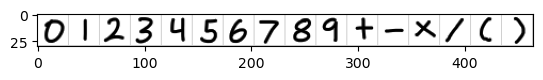

0123456789+-*/()
0123458789+-*/()
      ^         
Accuracy: 0.9375


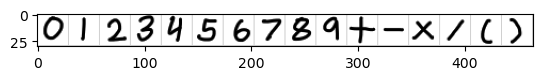

0123456789+-*/()
0123456789+-*/()
                
Accuracy: 1.0


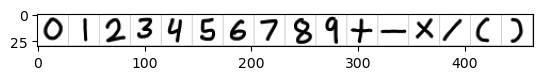

0123456789+-*/()
0123456759+-8/()
        ^   ^   
Accuracy: 0.875


In [38]:
getAccuracy("tokens0.png")
getAccuracy("tokens1.png")
getAccuracy("tokens2.png")

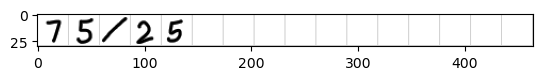

75/28
2.6785714285714284


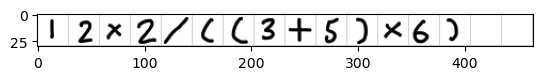

12*2/((3+5)*8)
0.375


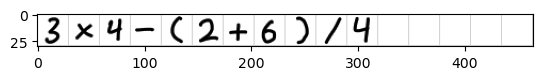

3*4-(2+6)/4
10.0


In [39]:
import traceback

def solve(path):
    try:
        expr = parseExpression(path=path)
        print(expr)
        print(eval(expr))
    except:
        traceback.print_exc()
for i in range(3): solve(f"expression{i}.png")

### Confusion matrix

In [40]:
# Jason's 20 x 16 dataset

dim = 28
    
def getHandwrittenData(path="handwritten_testing_data.png", verbose=False, displayOrig=True, factor=1):
    img = cv2.imread(path)[:,:,0]

    if displayOrig:
        temp = np.invert(np.array([img]))
        plt.imshow(temp[0], cmap=plt.cm.binary)
        plt.show()
    
    resInput = [None]*16
    for row in range(16):
        cur = [None]*20
        for col in range(20):
            sub = img[row*29+1:row*29+29, col*29+1:col*29+29]
            sub = np.invert(np.array([sub]))
    
            cur[col]=sub[0]
            if verbose:
                plt.imshow(sub[0], cmap=plt.cm.binary)
                plt.show()
        resInput[row] = cur

    resOutput = [None]*(20*16)
    for i in range(16):
        output = i
        for idx in range(i*20, i*20+20):
            resOutput[idx]=output
    resInput = resInput * factor
    resOutput = resOutput * factor
    return resInput, resOutput

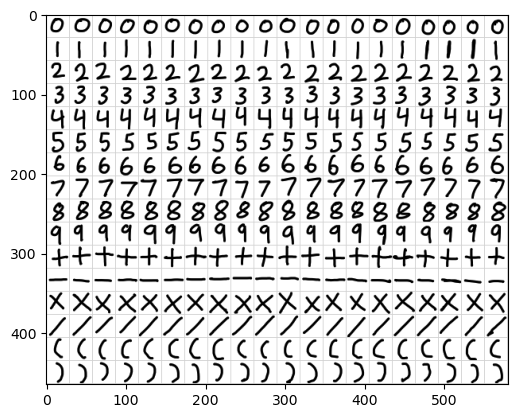

In [41]:
X_test, y_test = getHandwrittenData(path="handwritten_testing_data.png", verbose=False, displayOrig=True)

X_test = tf.reshape(X_test, (-1, 28, 28, 1))  # Assuming each image is 28x28 pixels

10/10 [==============================] - 0s 4ms/step


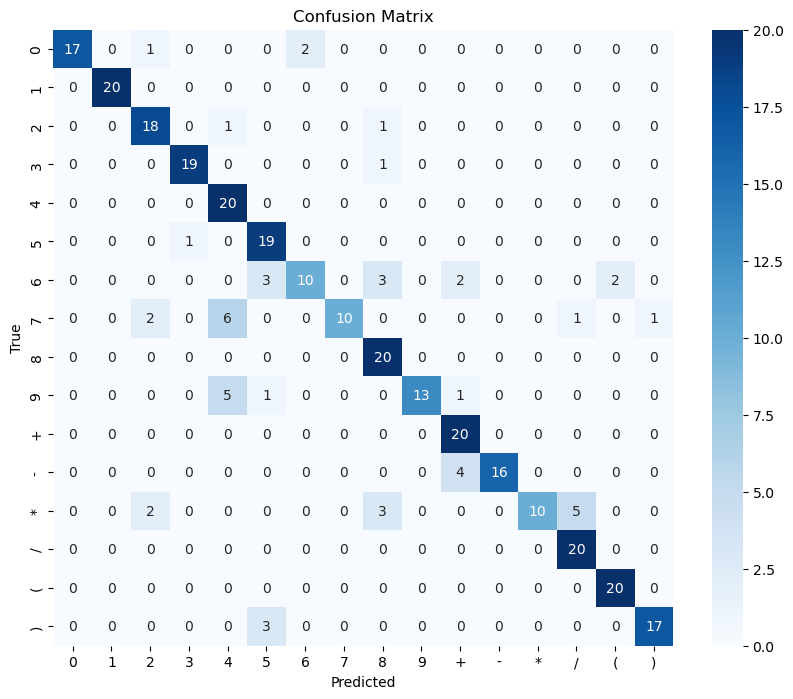

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
hm.set_xticklabels(list("0123456789+-*/()"))
hm.set_yticklabels(list("0123456789+-*/()"))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [43]:
import numpy as np

cm = confusion_matrix(y_test, y_pred)

# Initialize lists to store TN, TP, FN, FP for each class
TN = []
TP = []
FN = []
FP = []

for i in range(len(cm)):
    tp = cm[i, i]
    fp = sum(cm[:, i]) - tp
    fn = sum(cm[i, :]) - tp
    tn = sum(sum(cm)) - (tp + fp + fn)
    
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)

import pandas as pd
accuracy, precision, recall, f1 = [[0 for _ in range(len(cm))] for _ in range(4)]
for i in range(len(cm)):
	accuracy[i] = (TP[i]+TN[i])/(TP[i]+TN[i]+FP[i]+FN[i])
	precision[i] = TP[i]/(TP[i]+FP[i])
	recall[i] = TP[i]/(TP[i]+FN[i])
	f1[i] = 2*precision[i]*recall[i]/(precision[i]+recall[i])

rates = pd.DataFrame()
rates["Labels"] = list("0123456789+-*/()")
for rate, arr in zip(["TP", "FP", "FN", "TN", "Acc", "Prec", "Rec", "F1"], [TP, FP, FN, TN, accuracy, precision, recall, f1]): rates[rate] = arr
display(rates)

,Labels,TP,FP,FN,TN,Acc,Prec,Rec,F1
0,0,17,0,3,300,0.990625,1.000000,0.85,0.918919
1,1,20,0,0,300,1.000000,1.000000,1.00,1.000000
2,2,18,5,2,295,0.978125,0.782609,0.90,0.837209
3,3,19,1,1,299,0.993750,0.950000,0.95,0.950000
4,4,20,12,0,288,0.962500,0.625000,1.00,0.769231
5,5,19,7,1,293,0.975000,0.730769,0.95,0.826087
6,6,10,2,10,298,0.962500,0.833333,0.50,0.625000
7,7,10,0,10,300,0.968750,1.000000,0.50,0.666667
8,8,20,8,0,292,0.975000,0.714286,1.00,0.833333
9,9,13,0,7,300,0.978125,1.000000,0.65,0.787879


In [44]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Initialize lists to store precision, recall, F1 score, and accuracy for each class
precision = []
recall = []
f1_score = []
accuracy = []

# Calculate TN, TP, FN, FP for each class
for i in range(len(cm)):
    tp = cm[i, i]
    fp = sum(cm[:, i]) - tp
    fn = sum(cm[i, :]) - tp
    tn = sum(sum(cm)) - (tp + fp + fn)
    
    # Calculate precision, recall, f1 score, and accuracy
    precision_i = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall_i = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score_i = 2 * (precision_i * recall_i) / (precision_i + recall_i) if (precision_i + recall_i) > 0 else 0
    accuracy_i = (tp + tn) / (tp + tn + fp + fn)
    
    precision.append(precision_i)
    recall.append(recall_i)
    f1_score.append(f1_score_i)
    accuracy.append(accuracy_i)

# Display the results
for i in range(len(cm)):
    print(f"Class {i}:")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall: {recall[i]:.4f}")
    print(f"  F1 Score: {f1_score[i]:.4f}")
    print(f"  Accuracy: {accuracy[i]:.4f}")

Class 0:
  Precision: 1.0000
  Recall: 0.8500
  F1 Score: 0.9189
  Accuracy: 0.9906
Class 1:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
  Accuracy: 1.0000
Class 2:
  Precision: 0.7826
  Recall: 0.9000
  F1 Score: 0.8372
  Accuracy: 0.9781
Class 3:
  Precision: 0.9500
  Recall: 0.9500
  F1 Score: 0.9500
  Accuracy: 0.9938
Class 4:
  Precision: 0.6250
  Recall: 1.0000
  F1 Score: 0.7692
  Accuracy: 0.9625
Class 5:
  Precision: 0.7308
  Recall: 0.9500
  F1 Score: 0.8261
  Accuracy: 0.9750
Class 6:
  Precision: 0.8333
  Recall: 0.5000
  F1 Score: 0.6250
  Accuracy: 0.9625
Class 7:
  Precision: 1.0000
  Recall: 0.5000
  F1 Score: 0.6667
  Accuracy: 0.9688
Class 8:
  Precision: 0.7143
  Recall: 1.0000
  F1 Score: 0.8333
  Accuracy: 0.9750
Class 9:
  Precision: 1.0000
  Recall: 0.6500
  F1 Score: 0.7879
  Accuracy: 0.9781
Class 10:
  Precision: 0.7407
  Recall: 1.0000
  F1 Score: 0.8511
  Accuracy: 0.9781
Class 11:
  Precision: 1.0000
  Recall: 0.8000
  F1 Score: 0.8889
  Accurac

In [45]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Initialize lists to store precision, recall, and f1 score for each class
precision = []
recall = []
f1_score = []

# Calculate TP, FP, FN, TN for each class
for i in range(len(cm)):
    tp = cm[i, i]
    fp = sum(cm[:, i]) - tp
    fn = sum(cm[i, :]) - tp
    tn = sum(sum(cm)) - (tp + fp + fn)
    
    # Calculate precision, recall, and f1 score
    precision_i = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall_i = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score_i = 2 * (precision_i * recall_i) / (precision_i + recall_i) if (precision_i + recall_i) > 0 else 0
    
    precision.append(precision_i)
    recall.append(recall_i)
    f1_score.append(f1_score_i)

# Calculate macro-averaged metrics
macro_precision = np.mean(precision)
macro_recall = np.mean(recall)
macro_f1_score = np.mean(f1_score)

# Calculate weighted-averaged metrics
class_counts = np.sum(cm, axis=1)
weighted_precision = np.average(precision, weights=class_counts)
weighted_recall = np.average(recall, weights=class_counts)
weighted_f1_score = np.average(f1_score, weights=class_counts)

# Display the results
print(f"Macro-Averaged Precision: {macro_precision:.4f}")
print(f"Macro-Averaged Recall: {macro_recall:.4f}")
print(f"Macro-Averaged F1 Score: {macro_f1_score:.4f}")
print(f"Weighted-Averaged Precision: {weighted_precision:.4f}")
print(f"Weighted-Averaged Recall: {weighted_recall:.4f}")

Macro-Averaged Precision: 0.8750
Macro-Averaged Recall: 0.8406
Macro-Averaged F1 Score: 0.8336
Weighted-Averaged Precision: 0.8750
Weighted-Averaged Recall: 0.8406
